# 📦 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12,6)

# 📥 2. Load dataset

In [2]:
df = pd.read_csv("/content/train.csv")

# 🧹 3. Data Cleaning

In [3]:
df.fillna({
    'Age': df['Age'].median(),
    'Embarked': df['Embarked'].mode()[0],
    'Cabin': 'Unknown'
}, inplace=True)

# 🎯 4. Feature Engineering

In [4]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)
df['Deck'] = df['Cabin'].str[0]

# 🎛 5. Label Encoding

In [5]:
cols_to_encode = ['Sex', 'Embarked', 'Title', 'Deck']
for col in cols_to_encode:
    df[col] = LabelEncoder().fit_transform(df[col])

# 🧠 6. Correlation Heatmap

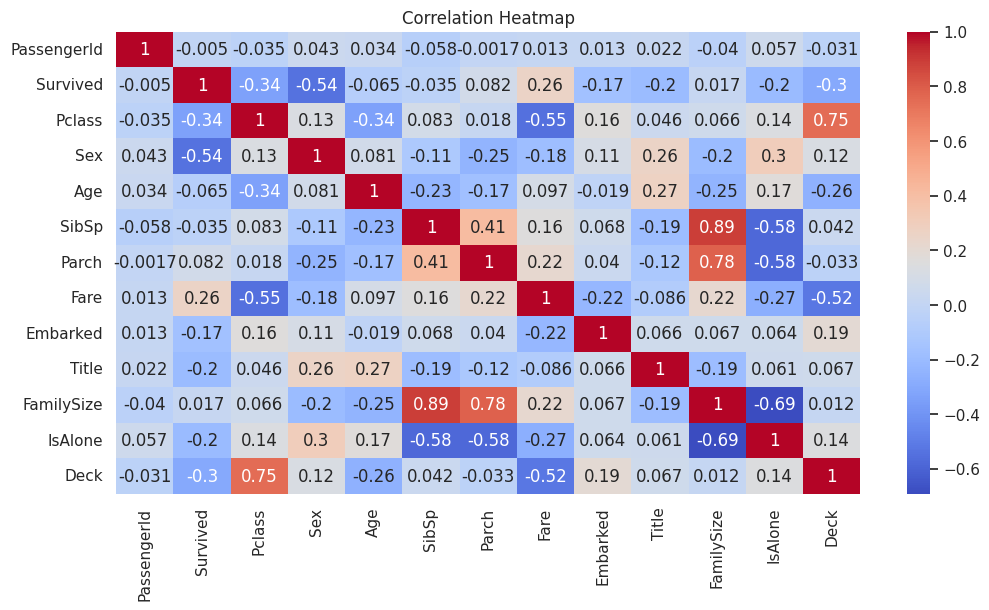

In [6]:
# 🔍 Filter only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 📈 Compute correlation on numeric columns only
corr_matrix = numeric_df.corr()

# 🔥 Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 📊 7. Visualizations

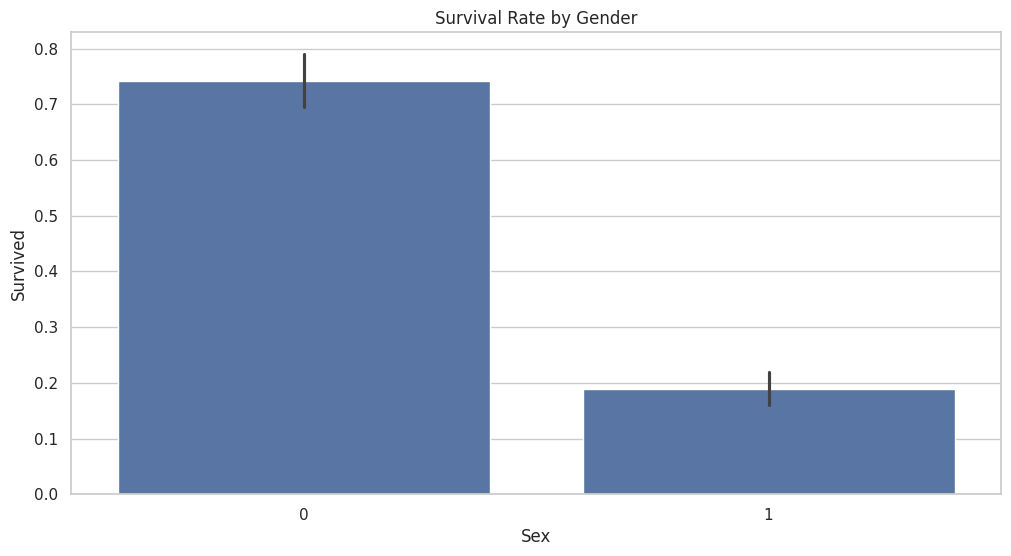

In [7]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

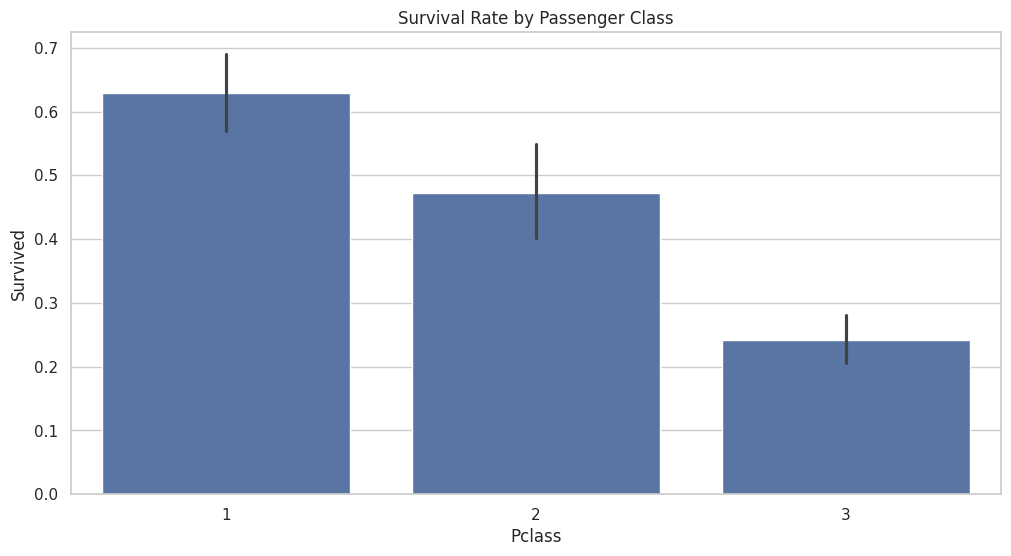

In [8]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

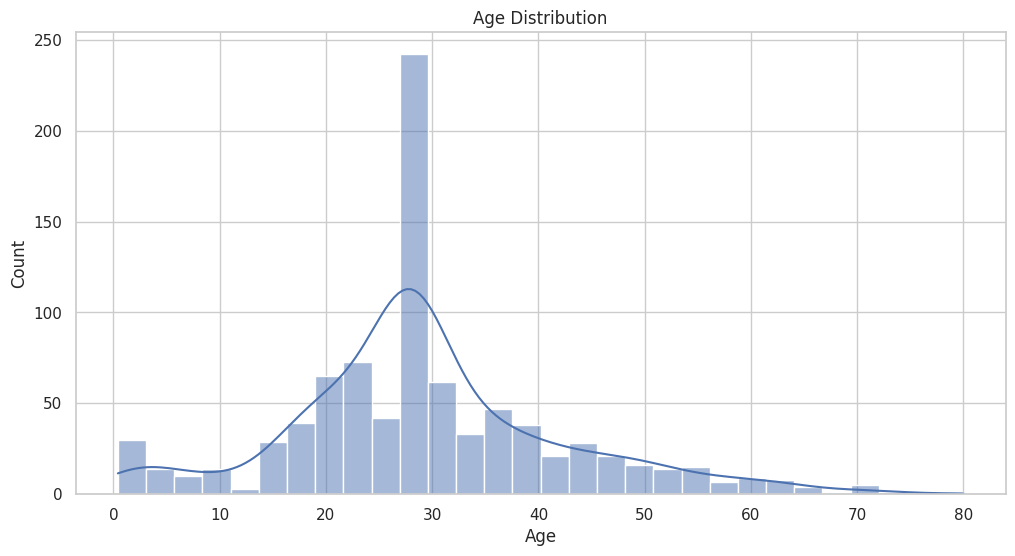

In [9]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# 🧪 8. Model Building

In [10]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title', 'Deck']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Logistic Regression

In [11]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Model 2: Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 🧾 9. Evaluation

In [13]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Random Forest Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



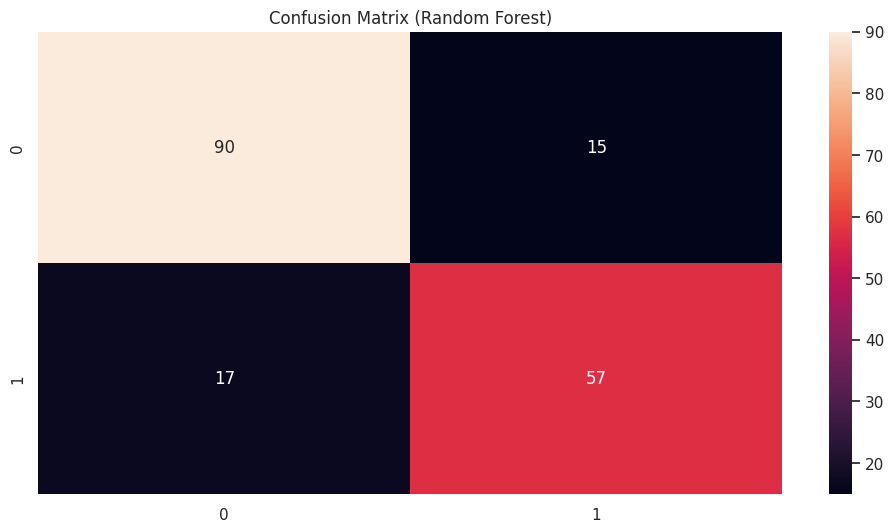

In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [15]:
import joblib
joblib.dump(rf, 'model.pkl')

['model.pkl']